In [1]:
import pandas as pd

# Step 1: Load and convert
df = pd.read_csv(r"C:\Users\ppran\Downloads\mumbai.csv", parse_dates=['month'])


print(df.dtypes)
print(df.head())


month                  datetime64[ns]
primary_price_avg             float64
secondary_price_avg           float64
retail_sales                  float64
non_retail_sales              float64
dtype: object
       month  primary_price_avg  secondary_price_avg  retail_sales  \
0 2022-04-01            72725.0            64930.769      27661.59   
1 2022-05-01            66600.0            59573.077      22515.88   
2 2022-06-01            59612.5            53680.769      14302.49   
3 2022-07-01            58200.0            54515.385      10101.02   
4 2022-08-01            56730.0            55841.667       7988.31   

   non_retail_sales  
0         64362.677  
1         58272.760  
2         48082.980  
3         33543.950  
4         28619.990  


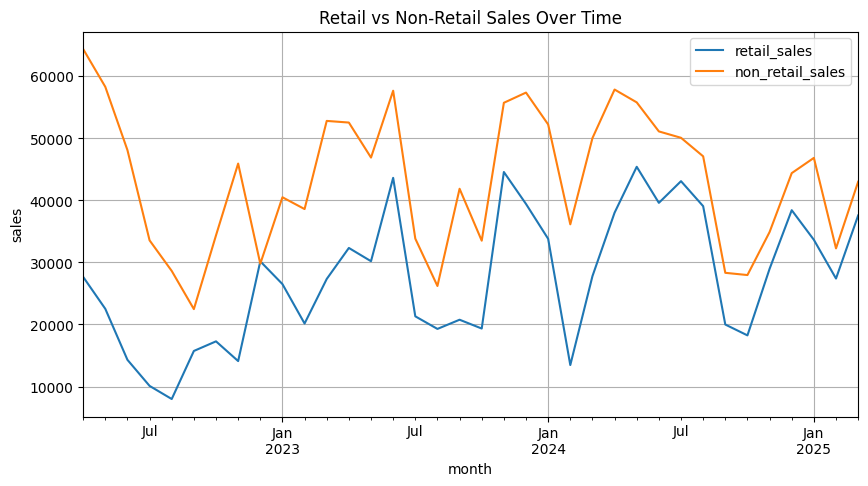

In [3]:
import matplotlib.pyplot as plt

df.plot(x='month', y=['retail_sales', 'non_retail_sales'], figsize=(10, 5))
plt.title('Retail vs Non-Retail Sales Over Time')
plt.xlabel('month')
plt.ylabel('sales')
plt.grid(True)
plt.show()


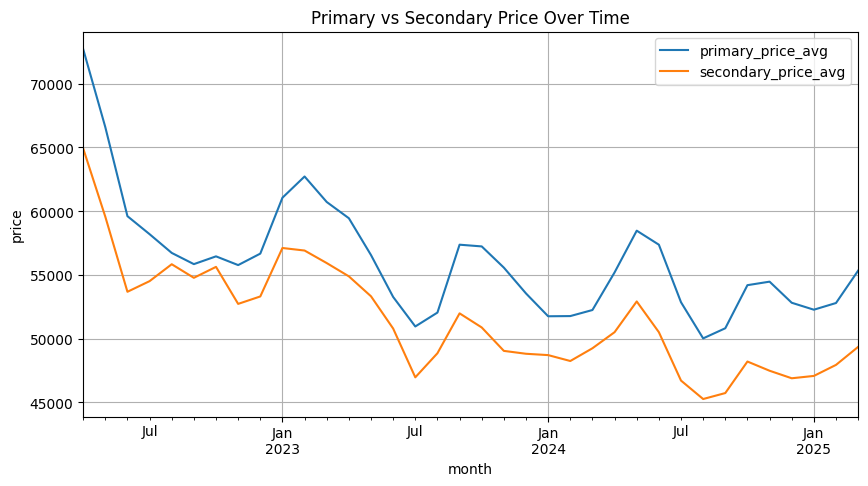

In [5]:
import matplotlib.pyplot as plt

df.plot(x='month', y=['primary_price_avg', 'secondary_price_avg'], figsize=(10, 5))
plt.title('Primary vs Secondary Price Over Time')
plt.xlabel('month')
plt.ylabel('price')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\ppran\Downloads\mumbai.csv", parse_dates=['month'])

# Step 1: Create price difference feature
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# Step 2: Select features and targets
features = ['primary_price_avg', 'secondary_price_avg', 'price_diff']
targets = ['retail_sales', 'non_retail_sales']

# Step 3: Evaluate each feature's effect using R² score
results = {}

for target in targets:
    results[target] = {}
    for feature in features:
        X = df[[feature]]
        y = df[target]

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)

        results[target][feature] = r2

# Step 4: Display the R² scores
import pprint
print("📊 R² Scores (Higher = Stronger Influence):")
pprint.pprint(results)


📊 R² Scores (Higher = Stronger Influence):
{'non_retail_sales': {'price_diff': 0.15703409559438342,
                      'primary_price_avg': 0.12447616248784399,
                      'secondary_price_avg': 0.04643353960928476},
 'retail_sales': {'price_diff': 0.13229385808042338,
                  'primary_price_avg': 0.024313647987659337,
                  'secondary_price_avg': 0.0984401945198754}}


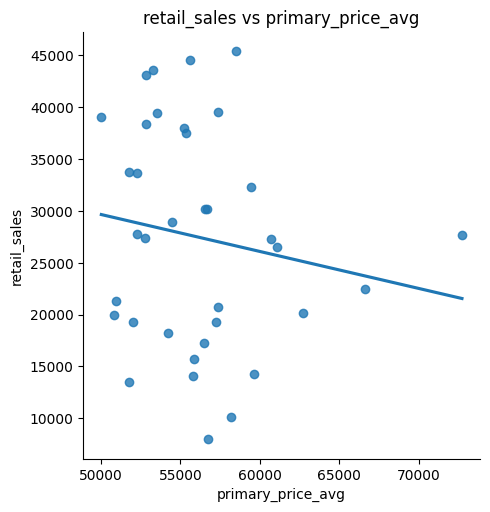

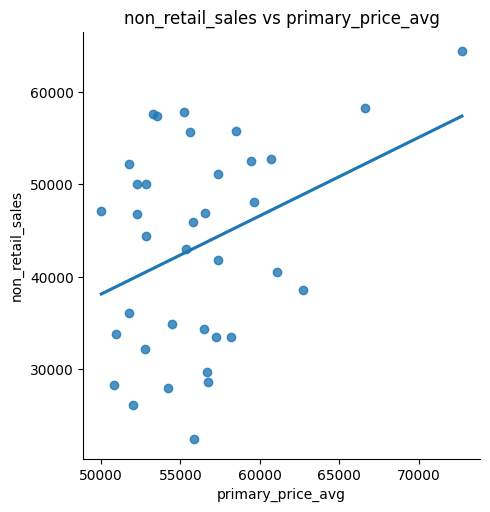

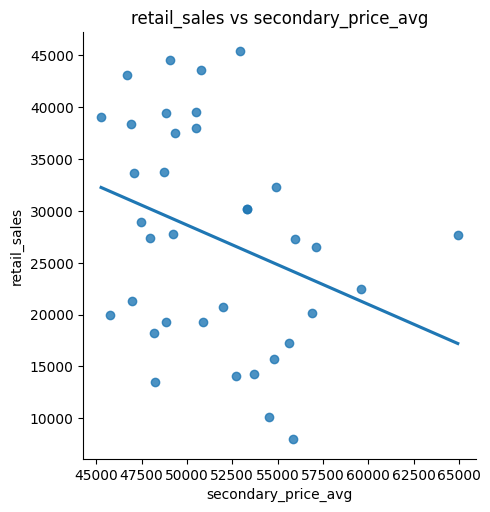

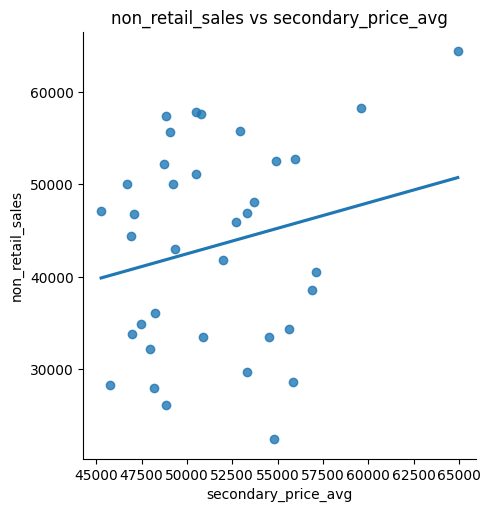

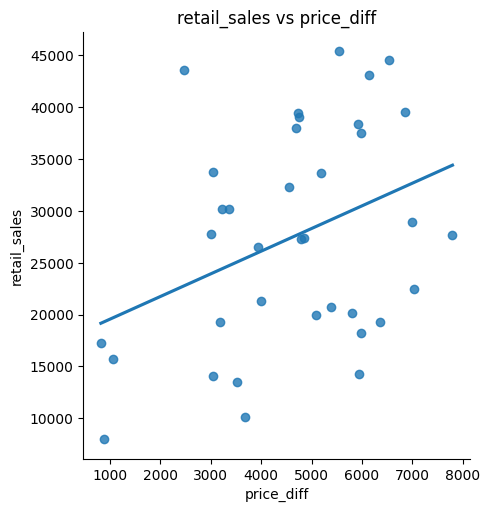

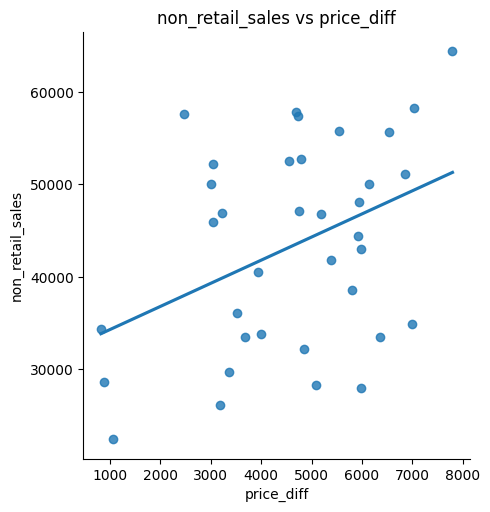

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    for target in targets:
        sns.lmplot(x=feature, y=target, data=df, ci=None)
        plt.title(f'{target} vs {feature}')
        plt.show()


In [1]:
import pandas as pd
import os

# === 1. Load your pre-sorted CSV ===
# 📍 CHANGE THIS PATH if your raw file is in a different folder or filename
df = pd.read_csv(r"C:\Users\ppran\Downloads\mumbai.csv", parse_dates=['month'])

# === 2. Parse the 'date' column ===
# Format is assumed to be like 'Apr-22' or '2022-04-01'
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')  # your format is '2022-04-01'

# === 3. Create price difference feature ===
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# === 4. Create lag features (1–3 months) for each variable ===
lag_features = ['retail_sales', 'non_retail_sales', 'primary_price_avg', 'secondary_price_avg', 'price_diff']

for feature in lag_features:
    for lag in range(1, 4):  # lag 1 to 3
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# === 5. Rolling 3-month average for price features ===
df['primary_price_roll3'] = df['primary_price_avg'].rolling(window=3).mean()
df['secondary_price_roll3'] = df['secondary_price_avg'].rolling(window=3).mean()

# === 6. Add calendar and time trend features ===
df['month'] = df['month'].dt.month             # 1 to 12
df['trend_index'] = range(len(df))            # 0, 1, 2, ...

# === 7. Drop rows without enough lag/rolling data (first 3 rows) ===
df = df.iloc[3:].reset_index(drop=True)

# === 8. Save to processed folder ===
# 📍 CHANGE THIS if you want to save elsewhere or rename file
processed_path = r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv"
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)

print(f"✅ Processed CSV saved at: {processed_path}")


✅ Processed CSV saved at: C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv


In [17]:
import pandas as pd

# Load your processed CSV
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv")  # or delhi_pr.csv, etc.

# Replace the 'month' column with proper datetime values (Apr 2022 to Mar 2025 = 36 months)
# We'll generate a clean date range starting from 2022-04-01
df['date'] = pd.date_range(start='2022-07-01', periods=len(df), freq='MS')

# Optional: move 'date' column to the front if you want
cols = df.columns.tolist()
cols = ['date'] + [col for col in cols if col != 'date']
df = df[cols]

# Save if needed
df.to_csv(r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv", index=False)

print(df.head())


        date  month  primary_price_avg  secondary_price_avg  retail_sales  \
0 2022-07-01      7            58200.0            54515.385     10101.020   
1 2022-08-01      8            56730.0            55841.667      7988.310   
2 2022-09-01      9            55850.0            54776.923     15729.050   
3 2022-10-01     10            56460.0            55635.000     17277.608   
4 2022-11-01     11            55775.0            52730.769     14100.590   

   non_retail_sales  price_diff  retail_sales_lag_1  retail_sales_lag_2  \
0          33543.95    3684.615           14302.490            22515.88   
1          28619.99     888.333           10101.020            14302.49   
2          22470.83    1073.077            7988.310            10101.02   
3          34352.95     825.000           15729.050             7988.31   
4          45910.81    3044.231           17277.608            15729.05   

   retail_sales_lag_3  ...  primary_price_avg_lag_3  \
0            27661.59  ...     

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your processed CSV
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv")  # change path per city

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])


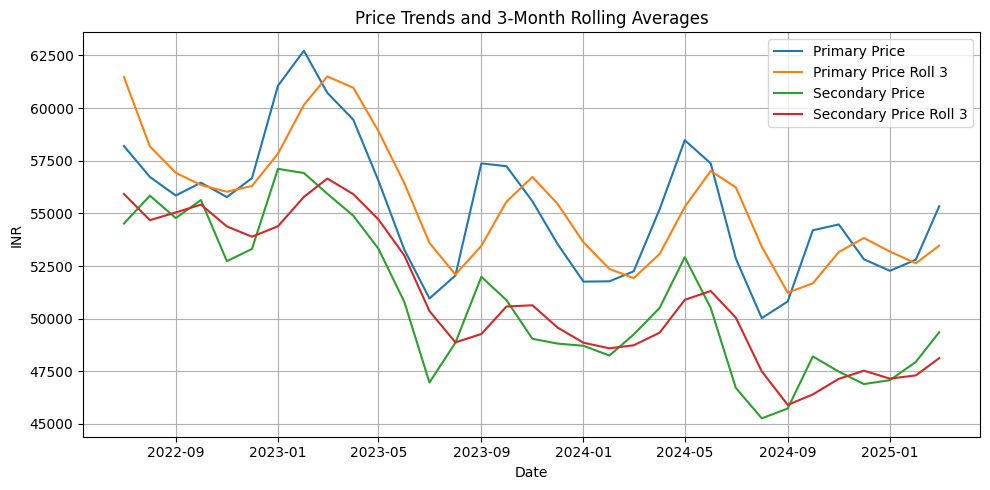

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['primary_price_avg'], label='Primary Price')
plt.plot(df['date'], df['primary_price_roll3'], label='Primary Price Roll 3')
plt.plot(df['date'], df['secondary_price_avg'], label='Secondary Price')
plt.plot(df['date'], df['secondary_price_roll3'], label='Secondary Price Roll 3')
plt.title("Price Trends and 3-Month Rolling Averages")
plt.xlabel("Date")
plt.ylabel("INR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


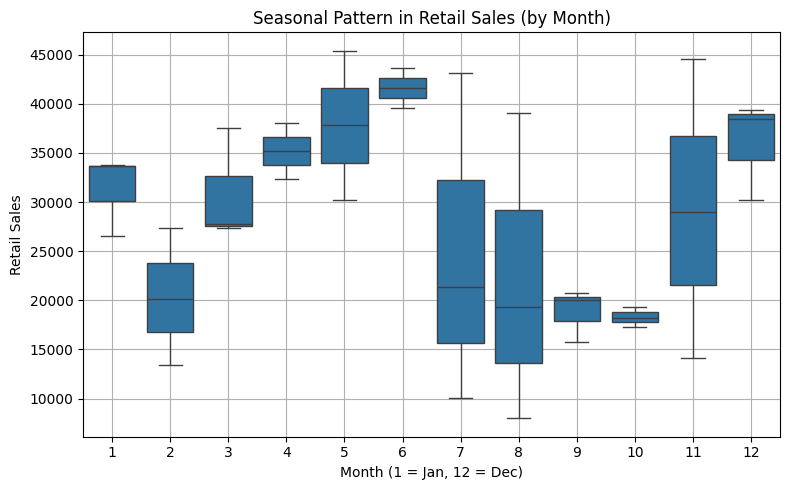

In [27]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['month'], y=df['retail_sales'])
plt.title("Seasonal Pattern in Retail Sales (by Month)")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Retail Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ppran\AppData\Local\Temp\ipykernel_14216\4097418391.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\ppran\Downloads\mumbai.csv", parse_dates=['month'])


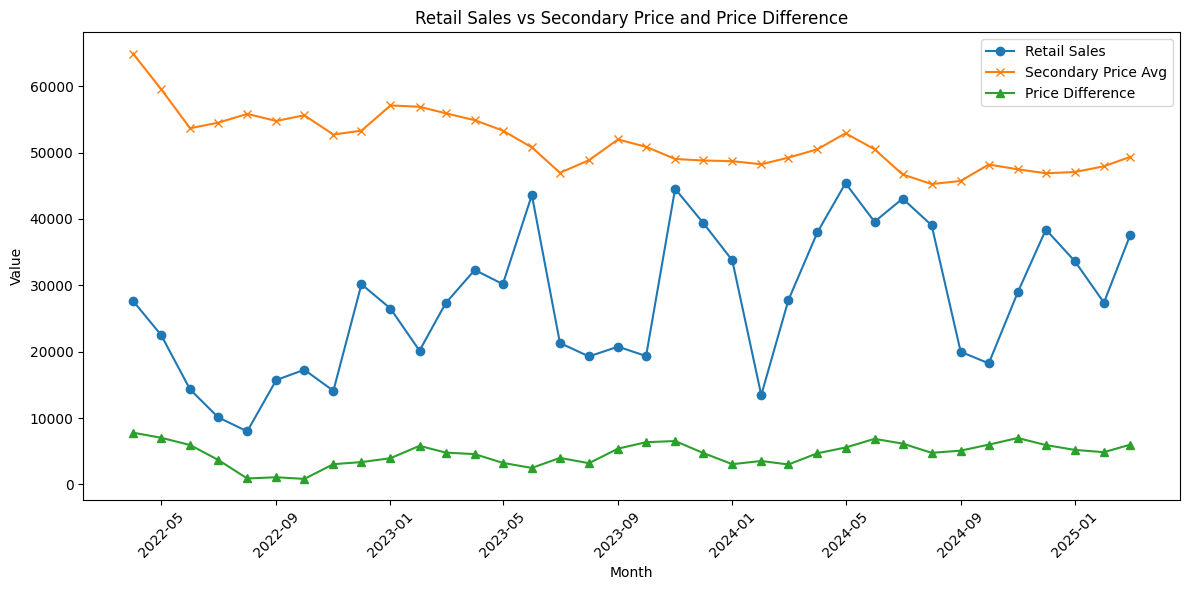

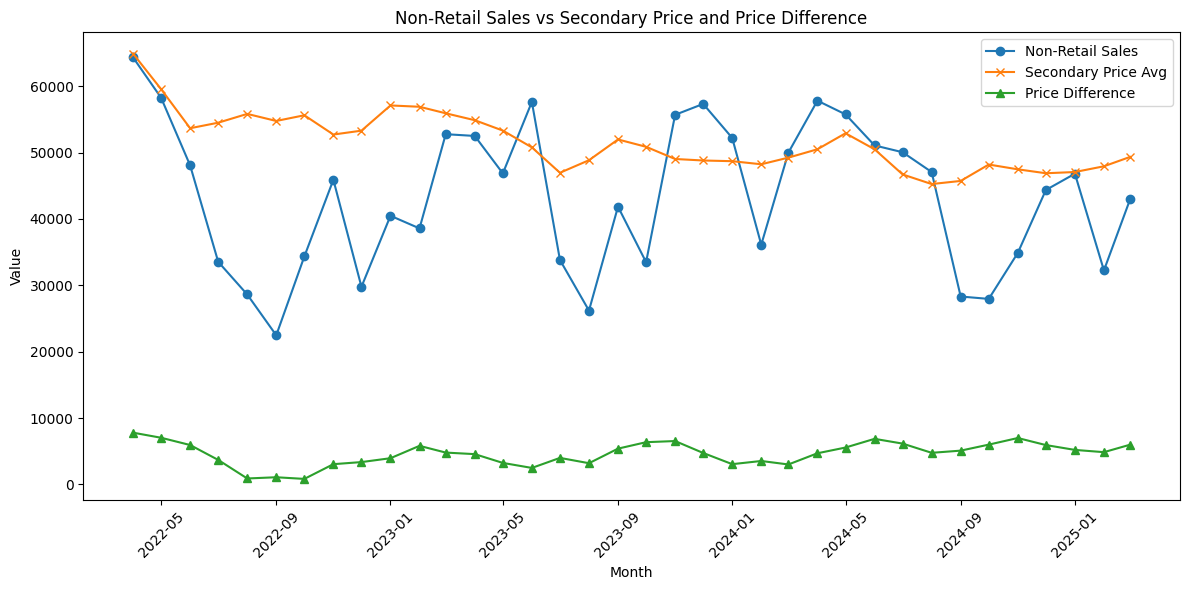

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv(r"C:\Users\ppran\Downloads\mumbai.csv", parse_dates=['month'])
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# Plot: Retail Sales, Secondary Price, and Price Difference
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['retail_sales'], label='Retail Sales', marker='o')
plt.plot(df['month'], df['secondary_price_avg'], label='Secondary Price Avg', marker='x')
plt.plot(df['month'], df['price_diff'], label='Price Difference', marker='^')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Retail Sales vs Secondary Price and Price Difference')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Non-Retail Sales, Secondary Price, and Price Difference
plt.figure(figsize=(12,6))
plt.plot(df['month'], df['non_retail_sales'], label='Non-Retail Sales', marker='o')
plt.plot(df['month'], df['secondary_price_avg'], label='Secondary Price Avg', marker='x')
plt.plot(df['month'], df['price_diff'], label='Price Difference', marker='^')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Non-Retail Sales vs Secondary Price and Price Difference')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd

# Load and sort by date
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv", parse_dates=['date'], dayfirst=True)
df = df.sort_values('date').reset_index(drop=True)

# Shift sales columns to get previous and next month values
retail_prev = df['retail_sales'].shift(1)
retail_next = df['retail_sales'].shift(-1)

non_retail_prev = df['non_retail_sales'].shift(1)
non_retail_next = df['non_retail_sales'].shift(-1)

# Calculate mean of previous and next months, ignoring NaNs (e.g. first and last rows)
df['retail_sales_custom_avg'] = pd.concat([retail_prev, retail_next], axis=1).mean(axis=1)
df['non_retail_sales_custom_avg'] = pd.concat([non_retail_prev, non_retail_next], axis=1).mean(axis=1)

# Save back to CSV
df.to_csv(r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv", index=False)


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 1. Read CSV with date parsing
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv", parse_dates=['date'], dayfirst=True)

# 2. Drop columns you don't want as features
df = df.drop(columns=['month', 'trend_index', 'date'])

# 3. Define targets and initialize dictionary to store results
targets = ['retail_sales', 'non_retail_sales']
feature_importances_results = {}

for target in targets:
    # Prepare features and target
    X = df.drop(columns=[target])
    y = df[target]
    
    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Extract and sort feature importances
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    feature_importances_results[target] = feature_importances
    
    print(f"\nTop features for target: {target}\n", feature_importances.head(5))

# If you want, you can access feature_importances_results['retail_sales'] or ['non_retail_sales'] for further use.



Top features for target: retail_sales
                         feature  importance
3              non_retail_sales    0.470350
22           retail_sales_roll3    0.121592
24  non_retail_sales_custom_avg    0.073114
4                    price_diff    0.045853
23       non_retail_sales_roll3    0.030961

Top features for target: non_retail_sales
                         feature  importance
24  non_retail_sales_custom_avg    0.320368
3                  retail_sales    0.270133
23       non_retail_sales_roll3    0.143878
19             price_diff_lag_3    0.061178
2                     stock_var    0.027075


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv", parse_dates=['date'], dayfirst=True)
df = df.drop(columns=['month', 'trend_index', 'date'])

# Feature sets for each target
features_retail = ['retail_sales_roll3', 'non_retail_sales_roll3', 'non_retail_sales_lag_3', 'non_retail_sales', 'price_diff']
features_non_retail = ['non_retail_sales_custom_avg', 'retail_sales', 'non_retail_sales_roll3', 'price_diff_lag_3', 'stock_var']
# Targets
target_retail = 'retail_sales'
target_non_retail = 'non_retail_sales'

# Prepare data
X_retail = df[features_retail]
y_retail = df[target_retail]

X_non_retail = df[features_non_retail]
y_non_retail = df[target_non_retail]

# Train-test split function for reuse
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Models dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

# Evaluation function
def evaluate_models(X, y):
    X_train, X_test, y_train, y_test = split_data(X, y)
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results[name] = {
            'MAE': mean_absolute_error(y_test, preds),
            'RMSE': np.sqrt(mean_squared_error(y_test, preds)),

            'R2': r2_score(y_test, preds)
        }
    return results

# Evaluate retail models
print("Evaluating models for retail sales:")
results_retail = evaluate_models(X_retail, y_retail)
for model_name, metrics in results_retail.items():
    print(f"{model_name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")

print("\nEvaluating models for non-retail sales:")
# Evaluate non-retail models
results_non_retail = evaluate_models(X_non_retail, y_non_retail)
for model_name, metrics in results_non_retail.items():
    print(f"{model_name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")


Evaluating models for retail sales:
Linear Regression: MAE=4616.223, RMSE=5633.964, R2=0.517
Random Forest: MAE=4744.276, RMSE=6239.894, R2=0.408
Gradient Boosting: MAE=3422.098, RMSE=4394.858, R2=0.706
SVR: MAE=7557.629, RMSE=9020.582, R2=-0.238

Evaluating models for non-retail sales:
Linear Regression: MAE=5489.440, RMSE=5955.488, R2=0.708
Random Forest: MAE=5991.873, RMSE=6256.433, R2=0.678
Gradient Boosting: MAE=6137.546, RMSE=7484.950, R2=0.539
SVR: MAE=10875.835, RMSE=11180.185, R2=-0.028


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your data
file_path = r"C:\Users\ppran\Downloads\notebook\processed\mumbai_pr.csv"
df = pd.read_csv(file_path, parse_dates=['date'], dayfirst=True)

# Drop unwanted columns but keep the date column
df = df.drop(columns=['month', 'trend_index']).dropna().reset_index(drop=True)

# Convert date to string format dd-mm-yyyy for saving later
df['date_str'] = df['date'].dt.strftime('%d-%m-%Y')

# Define features and targets
features_retail = ['retail_sales_roll3', 'non_retail_sales_roll3', 'non_retail_sales_lag_3', 'non_retail_sales', 'price_diff']
features_non_retail = ['non_retail_sales_roll3', 'retail_sales', 'stock_var', 'price_diff_lag_3', 'price_diff_lag_1']
target_retail = 'retail_sales'
target_non_retail = 'non_retail_sales'

# Prepare feature and target sets including date_str
X_r = df[features_retail]
y_r = df[target_retail]
dates_r = df['date_str']

X_nr = df[features_non_retail]
y_nr = df[target_non_retail]
dates_nr = df['date_str']

# Split data (features, target, and dates) for retail sales
X_train_r, X_test_r, y_train_r, y_test_r, dates_train_r, dates_test_r = train_test_split(
    X_r, y_r, dates_r, test_size=0.2, random_state=42)

# Split data (features, target, and dates) for non-retail sales
X_train_nr, X_test_nr, y_train_nr, y_test_nr, dates_train_nr, dates_test_nr = train_test_split(
    X_nr, y_nr, dates_nr, test_size=0.2, random_state=42)

# Train Linear Regression model and predict retail sales
model = LinearRegression()
model.fit(X_train_r, y_train_r)
preds_r = model.predict(X_test_r)

# Train Linear Regression model and predict non-retail sales
model.fit(X_train_nr, y_train_nr)
preds_nr = model.predict(X_test_nr)

# Combine results in a DataFrame, sorted by date
results_df = pd.DataFrame({
    'date': dates_test_r.values,
    'actual_retail_sales': y_test_r.values,
    'predicted_retail_sales': preds_r,
    'actual_non_retail_sales': y_test_nr.values,
    'predicted_non_retail_sales': preds_nr
}).sort_values('date')

# Save to CSV in the same folder
output_path = r"C:\Users\ppran\Downloads\notebook\processed\mumbai_predictions.csv"
results_df.to_csv(output_path, index=False)
print(f"Saved predictions to {output_path}")


Saved predictions to C:\Users\ppran\Downloads\notebook\processed\mumbai_predictions.csv
